# Handwritten (A-Z) Character Recognition 

###  Importing Libraries

In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Reading Dataset and Analyzing it

In [3]:
data = pd.read_csv('archive/A_Z Handwritten Data.csv')

In [4]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [6]:
data.shape

(372450, 785)

In [7]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [8]:
data.isnull().sum() #from below result it is clear that there are no null values

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [9]:
my_data = data.values
my_data

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0],
       [25,  0,  0, ...,  0,  0,  0]], dtype=int64)

### Splitting x and y column from dataset

In [10]:
X = my_data[:,1:]
y = my_data[:,:1]

In [11]:
print(X.shape)
print(y.shape)

(372450, 784)
(372450, 1)


### Split into train and validation set

In [12]:
#X_train.shape (297960, 784)
#(X_test.shape 74490, 784)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#reshaping to 28*28 pixels from 784
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [13]:
print(X_train.shape)
print(X_test.shape)

(297960, 28, 28)
(74490, 28, 28)


In [14]:
print(y_train.shape)
print(y_test.shape)

(297960, 1)
(74490, 1)


### Plotting number of images for each alphabet from Dataset

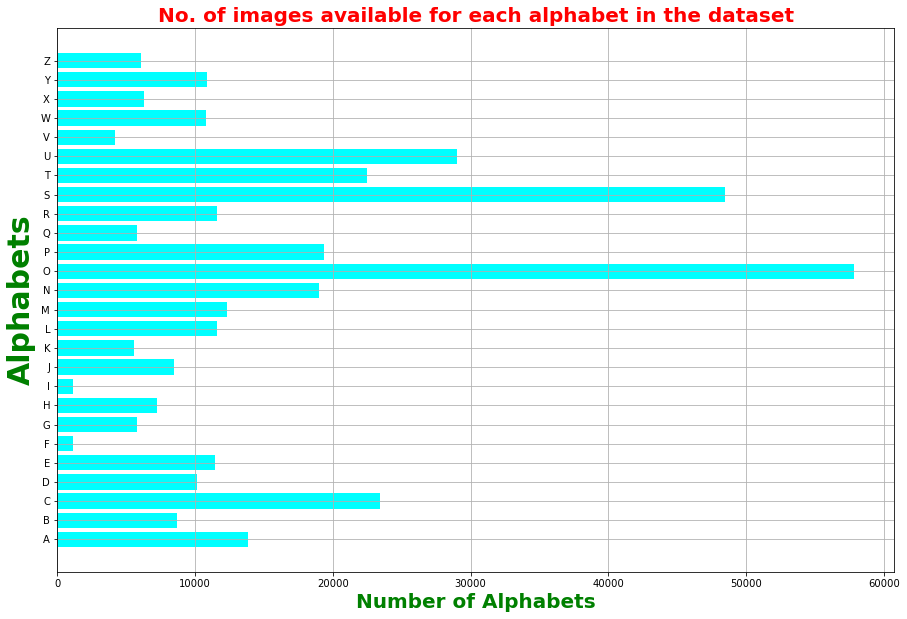

In [15]:
# Plotting the number of alphabets in the dataset
# 1): Firstly we create a count list of 26 entries of zeroes and then count each label in y and append them in the count list
# 2): Now we create a list – alphabets containing all the characters
# 3): After that using the count & alphabets lists we draw the horizontal bar plot.

count = np.zeros(26, dtype = 'int') #count list containing all zeroes

#counting each label
for i in y:
    count[i] += 1
# count = array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
#        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
#      48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

#creating a list of alphabets
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

plt.figure(figsize=(15,10))
plt.barh(alphabets, count, color = "cyan")
plt.xlabel("Number of Alphabets",fontsize = 20, fontweight = 'bold',color = 'green')
plt.ylabel("Alphabets",fontsize = 30, fontweight = 'bold',color = 'green')
plt.title("No. of images available for each alphabet in the dataset", fontsize = 20, fontweight = 'bold', color = "red")
plt.grid()
plt.show()

### Show random images

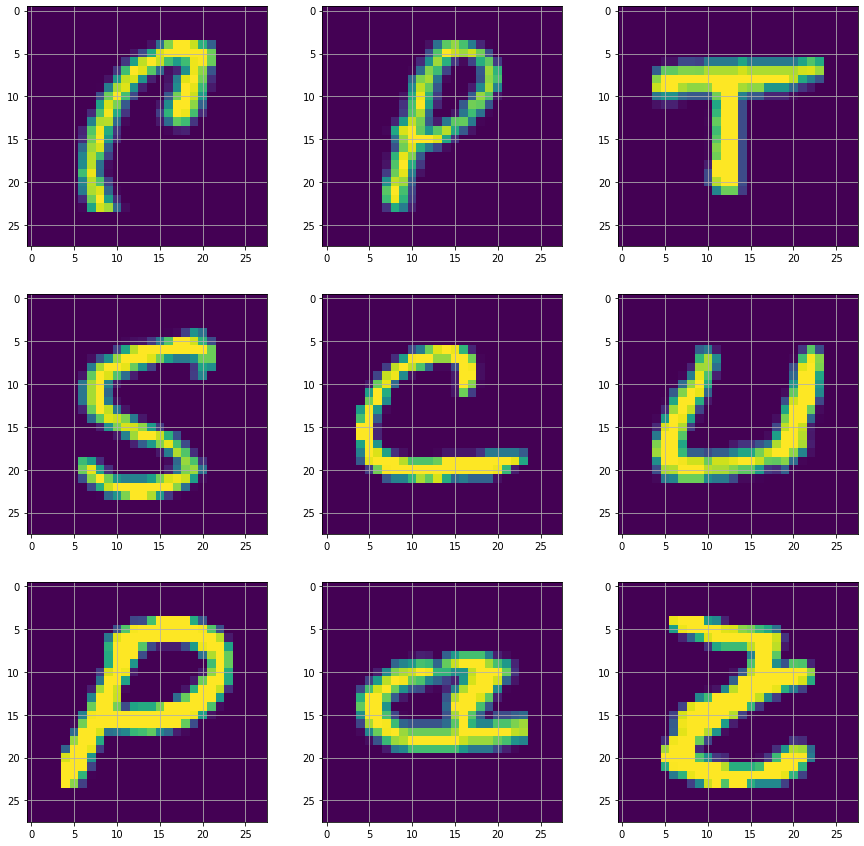

In [16]:
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(15,15))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

### Reshaping train & test images from dataset to put in the CNN Model

In [17]:
# Now we reshape the train & test image dataset so that they can be put in the model.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print("New shape of train and test dataset")
print(X_train.shape)
print(X_test.shape)

New shape of train and test dataset
(297960, 28, 28, 1)
(74490, 28, 28, 1)


### Downsampling the images to make them in the range of (0-1)

In [18]:
#downsampling the values
X_train = X_train/255.
X_test = X_test/255.

### Convert the int values of labels to categorical values of 26

In [20]:
# Here we convert the single int values to categorical values. 
# This is done as the CNN model takes input of labels & 
# generates the output as a vector of probabilities.

#   What is CNN?
#   CNN stands for Convolutional Neural Networks 
#   that are used to extract the features of the images using several layers of filters.

categorical_ytrain = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_ytrain.shape)

categorical_ytest = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_ytest.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


### CNN Model Architecture

In [21]:
model = Sequential()

#First Conv1D layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))

#Second Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Third Conv1D layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

#Dense layer 2
model.add(Dense(64,activation = 'relu'))

#Final layer of 26 nodes
model.add(Dense(26,activation = 'softmax'))

#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##### Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [24]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001) 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

##### Training the model and evaluate the performance on the holdout set:

In [25]:
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 100, callbacks=[es,mc], validation_data = (X_test,categorical_ytest))

Epoch 1/100
9312/9312 [==============================] - ETA: 0s - loss: 0.1510 - accuracy: 0.9568
Epoch 00001: val_accuracy improved from -inf to 0.97959, saving model to best_model.h5
9312/9312 [==============================] - 55s 5ms/step - loss: 0.1510 - accuracy: 0.9568 - val_loss: 0.0713 - val_accuracy: 0.9796
Epoch 2/100
9301/9312 [============================>.] - ETA: 0s - loss: 0.0602 - accuracy: 0.9832
Epoch 00002: val_accuracy improved from 0.97959 to 0.98212, saving model to best_model.h5
9312/9312 [==============================] - 47s 5ms/step - loss: 0.0602 - accuracy: 0.9833 - val_loss: 0.0654 - val_accuracy: 0.9821
Epoch 3/100
9307/9312 [============================>.] - ETA: 0s - loss: 0.0450 - accuracy: 0.9875
Epoch 00003: val_accuracy improved from 0.98212 to 0.98883, saving model to best_model.h5
9312/9312 [==============================] - 46s 5ms/step - loss: 0.0450 - accuracy: 0.9875 - val_loss: 0.0428 - val_accuracy: 0.9888
Epoch 4/100
9305/9312 [===========

In [27]:
#evaluating model on test dataset
model.evaluate(X_test,categorical_ytest)

2328/2328 [==============================] - 6s 2ms/step - loss: 0.0452 - accuracy: 0.9922


[0.04515548422932625, 0.9922137260437012]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

### Find accuracy, losses of Model

In [40]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9922137260437012
The training accuracy is : 0.9947375655174255
The validation loss is : 0.04515548422932625
The training loss is : 0.019459007307887077


#### Plotting the Model loss and Accuracy on the line graph

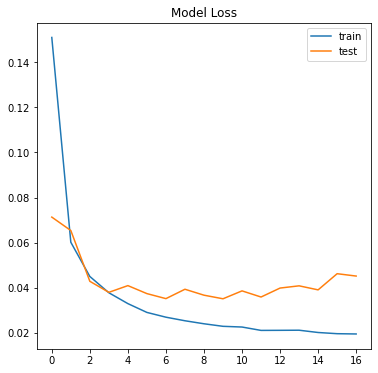

In [49]:
plt.figure(figsize = (6,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Model Loss")
plt.show()

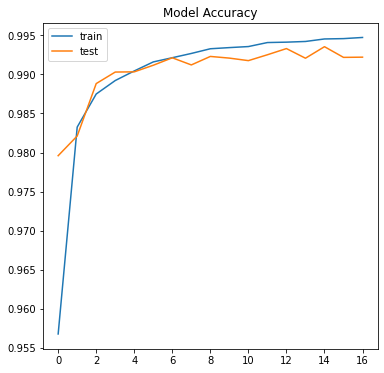

In [51]:
plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()

### Making prediction of test data

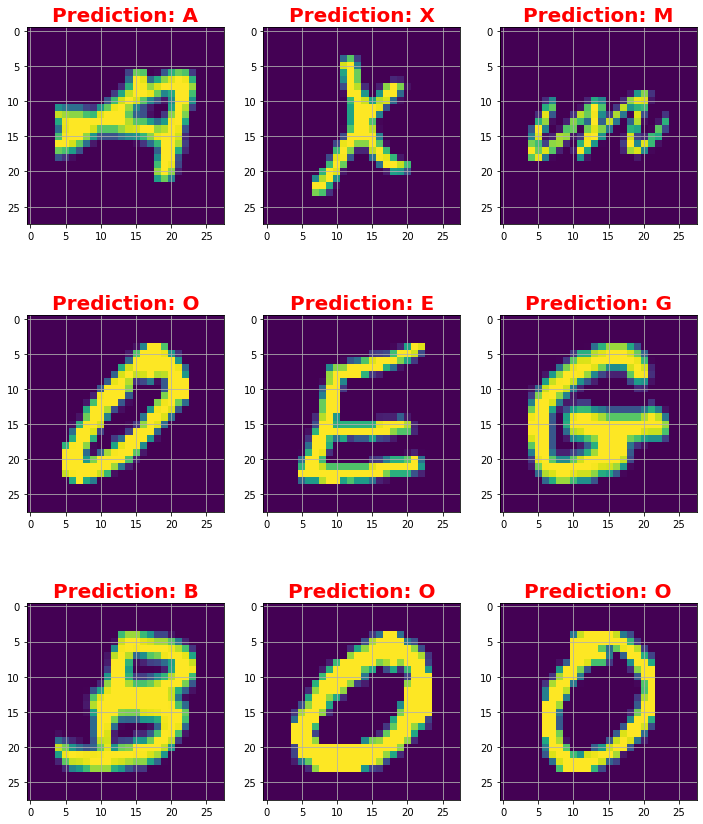

In [48]:
# Here we are creating 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions, 
# that are made using the model.predict() function for text recognition.

#creating a dictionary of letters with index
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img_list_test = shuffle(X_test[:1000])
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i in range(9):
    img = np.reshape(X_test[i], (28, 28))
    axes[i].imshow(img_list_test[i])
    
    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i],(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    axes[i].grid()